<a href="https://colab.research.google.com/github/zaegeon/Python/blob/main/20220530_DA08_str.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리 import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 셋

In [ ]:
# GitHub에 저장된 파일 경로
movies_dat = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/movies.dat'

In [ ]:
movies = pd.read_csv(movies_dat, # 데이터 파일 이름 & 저장 경로
                     sep="::",   # 구분자(separator) : 값들을 구분하는 문자(열). 기본값은 comma(,)
                     names=['movie_id', 'title', 'genres'],   # 컬럼 이름. 파일 첫 번째 줄에 컬럼 이름이 없는 경우.
                     engine='python')       # ParseWarning을 제거하기 위해서.
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


문자열로 이루어진 컬럼 내용을 조작 : `str` 접근자(accessor) 사용하면 문자열 메서드들을 사용할 수 있음.

* genres가 animation인 영화는 몇 개?
* 로맨틱 코미디 장르인 영화는 몇 개?
* (중복되지 않는) 전체 장르 개수 (장르의 unique 값들)
* 자주 등장하는 장르 상위 10개
* 연도의 unique 값의 개수
* 각 연도별 개봉 영화 개수

## Animation 장르

In [ ]:
# genres 문자열에 'Animation'이 포함된 레코드들을 선택.
animations = movies[movies.genres.str.contains('Animation')]
animations

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
12,13,Balto (1995),Animation|Children's
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children's|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children's
...,...,...,...
3690,3759,Fun and Fancy Free (1947),Animation|Children's|Musical
3706,3775,Make Mine Music (1946),Animation|Children's|Musical
3707,3776,Melody Time (1948),Animation|Children's|Musical
3730,3799,Pokémon the Movie 2000 (2000),Animation|Children's


In [ ]:
len(animations) # 105

105

In [ ]:
# 로맨틱 코미디 - genres 문자열이 'Romance' & 'Comedy'를 포함
romantic_comedies = movies[movies.genres.str.contains('Romance') & movies.genres.str.contains('Comedy')]
romantic_comedies

,movie_id,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
38,39,Clueless (1995),Comedy|Romance
63,64,Two if by Sea (1996),Comedy|Romance
...,...,...,...
3679,3748,"Match, The (1999)",Comedy|Romance
3759,3829,Mad About Mambo (2000),Comedy|Romance
3804,3874,"Couch in New York, A (1996)",Comedy|Romance
3815,3885,Love & Sex (2000),Comedy|Romance


In [ ]:
len(romantic_comedies) # 204

204

## 장르들의 unique 값

In [ ]:
movies.genres.str.split("|")

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: genres, Length: 3883, dtype: object

In [ ]:
movie_genre = []
for gen_arr in movies.genres.str.split("|"):
    movie_genre.extend(gen_arr)
movie_genre[:10]

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 "Children's",
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama']

In [ ]:
# pd.value_counts() 함수 : argument로 1차원 배열, 리스트, Series 등을 전달.
pd.value_counts(movie_genre)

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

In [ ]:
genre_counts = pd.value_counts(movie_genre)

In [ ]:
genre_counts.index

Index(['Drama', 'Comedy', 'Action', 'Thriller', 'Romance', 'Horror',
       'Adventure', 'Sci-Fi', 'Children's', 'Crime', 'War', 'Documentary',
       'Musical', 'Mystery', 'Animation', 'Fantasy', 'Western', 'Film-Noir'],
      dtype='object')

In [ ]:
# 자주 등장하는 상위 10개 장르
genre_counts.iloc[:10].index

Index(['Drama', 'Comedy', 'Action', 'Thriller', 'Romance', 'Horror',
       'Adventure', 'Sci-Fi', 'Children's', 'Crime'],
      dtype='object')

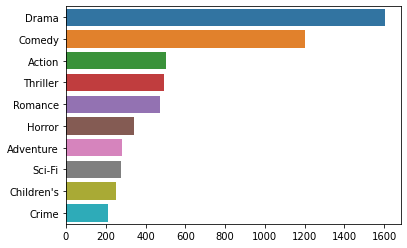

In [ ]:
# 상위 10개 장르 시각화
top10_genres = genre_counts.iloc[:10]
sns.barplot(x=top10_genres.values, y=top10_genres.index)
plt.show()

## 개봉 연도 분석

In [ ]:
s = 'Toy Story (1995)'
s[-5:-1]

'1995'

In [ ]:
movies.title.str[-5:-1] # dtype : object

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
3878    2000
3879    2000
3880    2000
3881    2000
3882    2000
Name: title, Length: 3883, dtype: object

In [ ]:
years = movies.title.str[-5:-1].astype('int') # dtype : int64
years

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
3878    2000
3879    2000
3880    2000
3881    2000
3882    2000
Name: title, Length: 3883, dtype: int64

In [ ]:
years.unique()

array([1995, 1994, 1996, 1976, 1993, 1992, 1988, 1967, 1964, 1977, 1965,
       1982, 1962, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970,
       1960, 1955, 1956, 1959, 1968, 1980, 1975, 1986, 1948, 1943, 1963,
       1950, 1946, 1987, 1997, 1974, 1958, 1949, 1972, 1998, 1933, 1952,
       1951, 1957, 1961, 1954, 1934, 1944, 1942, 1941, 1953, 1939, 1947,
       1945, 1938, 1935, 1936, 1926, 1932, 1930, 1971, 1979, 1966, 1978,
       1985, 1983, 1984, 1931, 1922, 1927, 1929, 1928, 1925, 1923, 1999,
       1919, 2000, 1920, 1921])

In [ ]:
year_counts = years.value_counts()
year_counts

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1919      3
1922      2
1920      2
1921      1
Name: title, Length: 81, dtype: int64

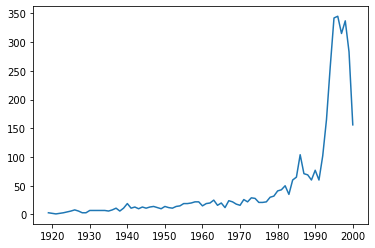

In [ ]:
# 연도별 개수를 선그래프로 시각화
sns.lineplot(x=year_counts.index, y=year_counts.values, ci=None)
plt.show()

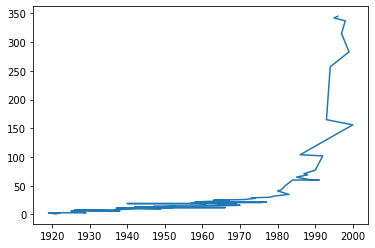

In [ ]:
plt.plot(year_counts.index, year_counts.values)
plt.show() # year_counts 빈도수로 정렬한대로 그래프를 그림

In [ ]:
year_counts_sorted = year_counts.sort_index()
year_counts_sorted

1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: title, Length: 81, dtype: int64

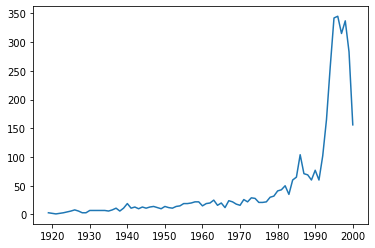

In [ ]:
plt.plot(year_counts_sorted.index, year_counts_sorted.values)
plt.show()

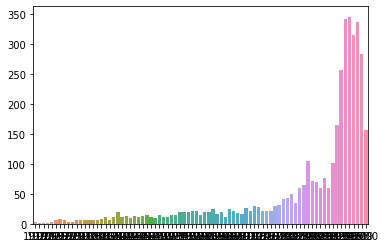

In [ ]:
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.show()

## 파생변수

In [ ]:
# df['new_name'] = Series
movies['year'] = movies.title.str[-5:-1].astype('int')

In [ ]:
movies

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


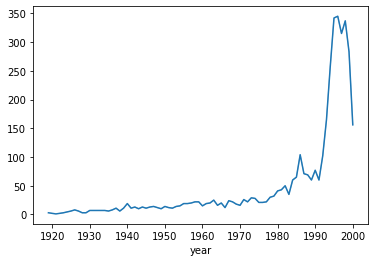

In [ ]:
sns.lineplot(x='year', data=movies, estimator=np.size)
plt.show()

# `str` accessor(접근자)와 메서드 연쇄 호출

In [ ]:
'Animation|Children|Comedy'.find('animation')

-1

In [ ]:
movies.genres.str.lower().str.split("|")

0        [animation, children's, comedy]
1       [adventure, children's, fantasy]
2                      [comedy, romance]
3                        [comedy, drama]
4                               [comedy]
                      ...               
3878                            [comedy]
3879                             [drama]
3880                             [drama]
3881                             [drama]
3882                   [drama, thriller]
Name: genres, Length: 3883, dtype: object